In [2]:
%load_ext abjad.ext.ipython
from abjad import *

# Bottom-up Work with Leaves (Notes, Chords, Rests, and Skips)

## Intro 

Abjad extends the Python programming language with an object-oriented model of common practice music notation. To work with this model, we'll need to understand two key concepts: 1) object orientation and 2) the leaf, container, spanner, indicator (LCSI) model of a score.

## An Object-oriented Model of Music Notation 

What does it mean that we have an object model of music notation? To answer this question, we'll first make a single note by calling the Note class's initializer method.

In [3]:
grape = Note()

We now have a new note called `grape.` If we forget what we've made because of our whimsical name, we can type the name of our note into the interpreter to see what it is.

In [4]:
grape

Note("c'4")

Sure enough, it's a note, with a LilyPond string of middle C and a quarter-note duration, which are unspecified default values.

So what happened when we made our note? In our object model, we have a class called `Note` that models a musical note. A class is a template for a certain kind of thing. The `Note` class models the characteristics of a note (attributes). To make a new note (a new instance of the Note class), we called our class's initializer method, `Note()`, and assigned the returned instance to a variable, named whatever we like (on the left side of the equals sign). You will see this pattern of instantiating objects through right-to-left assignment over and over, throughout the system.

Once we have our note instance, we can access characteristics about our note that we'd expect it to have using dot chaining syntax, where we start with our variable name and continue, after a dot, with the attribute we'd like to get:

In [5]:
grape.written_pitch

NamedPitch("c'")

In [6]:
grape.written_duration

Duration(1, 4)

In addition to getting these attributes, we can also write them using the same syntax -- here we change the pitch of our note to be inaudibly high:

In [7]:
grape.written_pitch = "fs'''''''''''''''"

And now, when we ask the interpreter what grape is, its written pitch has been changed.

In [8]:
grape

Note("fs'''''''''''''''4")

We can do the same with our note's duration, and see the change in the note's LilyPond string.

In [9]:
grape.written_duration = (1,2)

In [10]:
grape

Note("fs'''''''''''''''2")

The many classes in Abjad give you models of all common notational symbols. You can see a list of attributes and methdos for each class in Abjad's [API Documentation](http://abjad.mbrsi.org/api/).

For example, to find the `Note` class, we look in the scoretools package in the API reference. `scoretools` contains the most commonly used score elements. Under "leaves" we find the Note class. When we click `Note`, we're taken to [the reference page for `Note`](http://abjad.mbrsi.org/api/tools/scoretools/Note.html). The attributes summary shows us which characteristics of a note have been modelled. The read/write properties portion, often with examples, shows us which attributes we can read/write.

## Other Leaf Classes

We notice in the API reference that there are other classes listed under scoretools-Leaves. We can create Rests, Chords, Skips in the same way we made our note.

In [11]:
rest = Rest()
rest

Rest('r4')

We get a default value of a quarter-note, but we can also pass in an argument -- either a duration or a LilyPond string -- to choose something other than the default.

In [12]:
rest = Rest("r8..")
rest

Rest('r8..')

In [13]:
rest = Rest((7,32))
rest

Rest('r8..')

Likewise, we can make notes other than a middle C quarter note by passing in arguments. We can make a new note using a LilyPond string,

In [14]:
note = Note("ds'32")
note

Note("ds'32")

Or by giving two comma-separated pitch and duration arguments:

In [15]:
note = Note(3, (1,32))

Note that Abjad represents pitch numerically by equating 0 to middle C. A pitch of 3 corresponds to three half-steps above middle C.

In [16]:
note

Note("ef'32")

Hm - we got a flat, but we wanted a sharp. Good thing we can change Abjad's default accidental spellings:

In [17]:
abjad_configuration.set_default_accidental_spelling('sharps')
note = Note(3, (1,32))
note

Note("ds'32")

Chords work similarly:

In [18]:
chord = Chord("<c' e' g'>8.")
chord

Chord("<c' e' g'>8.")

In [19]:
chord = Chord([0,4,7], (3,16))
chord

Chord("<c' e' g'>8.")

As do skips (blank spaces that occupy a specified duration -- like rests without the drawn symbol.)

In [20]:
skip = Skip("s8.")
skip

Skip('s8.')

In [21]:
skip = Skip((3,16))
skip

Skip('s8.')

And remember, we can get back to the attributes of our leaves using dot chaining syntax.

In [22]:
skip.written_duration

Duration(3, 16)

In [23]:
chord.written_duration

Duration(3, 16)

In [24]:
rest.written_duration

Duration(7, 32)

You can also instantiate a new leaf instance from an existing leaf:

In [25]:
note

Note("ds'32")

In [26]:
rest = Rest(note)
rest

Rest('r32')

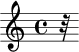

In [27]:
show(rest)

## The Leaf, Container, Spanner, Indicator Model

Be sure you understand the explanation of Abjad's score tree model, as illustated here: http://abjad.mbrsi.org/core_concepts/lcsi.html
        
In summary --
Leaves: instances of `Note`, `Chord`, `Rest`, and `Skip`, as above. These can be arranged together sequentially or simultaneously in

Containers: `Tuplet`, `Voice`, `Staff`, and `Score`. Containers can contain leaves directly (a staff containing notes) or can contain other containers hierarchically (a `Score` containing a `StaffGroup` containing two `Staffs` which both contain leaves):





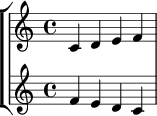

In [28]:
staff1 = Staff("c' d' e' f'")
staff2 = Staff("f' e' d' c'")
group = StaffGroup([staff1, staff2])
score = Score([group])
show(score)

Spanners: anything that spans from one component to another, i.e. a phrasing slur that starts at one note and ends at another note, spanning everything in between. Here, we slur all the notes in our staff1 container by attaching an instance of the `PhrasingSlur` class to all the notes contained in staff1:

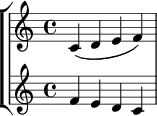

In [29]:
slur = spannertools.PhrasingSlur()
attach(slur, staff1[:])
show(score)

Indicators: anything that attaches to a single component. Some indicators become effective at that point and remain so until a change (dynamic markings, time signatures, tempo markings) and some impact only the note to which they attach (articulations). Here we use indexing to attach an articulation to the second component in our staff2 container (remember that indexes count from 0, so index 1 is the second component in the container).

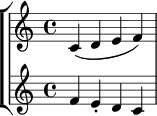

In [30]:
staccato = Articulation('staccato')
attach(staccato, staff2[1])
show(score)

It might be the case that we want to apply the same indicator to a consecutive series of leaves. Note that we can use iteration to do the same thing to multiple components sequentially -- here we use slice notation to apply a staccato marking to every leaf in staff1 after the first note:

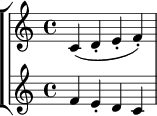

In [31]:
for leaf in staff1 [1:]:
    staccato = Articulation('staccato')
    attach(staccato, leaf)
show(score)

## Making Many Leaves

We can use anything in Python -- from built-in libraries to any of its thousands of external libraries -- to create leaves. Python's list comprehension syntax allows us to describe lists more easily:

In [32]:
notes = [Note(x,(1,8)) for x in range(24+1)]

The above list comprehension means, "a list of eighth notes with pitch values from 0 through 24."

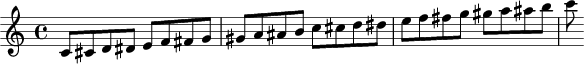

In [33]:
staff = Staff(notes)
show(staff)

We can use external libraries, too -- here we generate a hundred random numbers and use them as pitch values:

In [34]:
import random
numbers = [random.randrange(0,25) for x in range(100)]
numbers

[1,
 3,
 18,
 0,
 13,
 12,
 12,
 14,
 14,
 18,
 17,
 15,
 5,
 15,
 17,
 9,
 8,
 11,
 7,
 18,
 1,
 7,
 20,
 7,
 13,
 6,
 6,
 14,
 15,
 6,
 9,
 16,
 8,
 4,
 11,
 22,
 9,
 24,
 16,
 19,
 13,
 11,
 24,
 1,
 14,
 8,
 23,
 12,
 2,
 0,
 11,
 15,
 22,
 4,
 19,
 24,
 21,
 8,
 2,
 22,
 2,
 3,
 6,
 0,
 10,
 16,
 23,
 18,
 9,
 16,
 0,
 21,
 22,
 24,
 23,
 4,
 19,
 7,
 1,
 15,
 3,
 0,
 9,
 19,
 24,
 16,
 16,
 21,
 6,
 17,
 16,
 17,
 11,
 13,
 18,
 9,
 23,
 23,
 12,
 18]

Whoa - that's a lot of numbers. Let's just use a few of them - we can use list slicing syntax to take the portion of our list from the beginning through the tenth element:

In [35]:
numbers = numbers[:10]
numbers

[1, 3, 18, 0, 13, 12, 12, 14, 14, 18]

And now we can turn them into notes with a list comprehension:

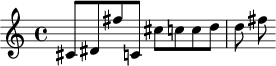

In [36]:
notes = [Note(x,(1,8)) for x in numbers]
staff = Staff(notes)
show(staff)

N.B. we've just been using integers as chromatic pitch numbers, but we could use them as anything else we like (rhythmic durations, for example). Quarter-tone accidentals are also possible, using .5 resolution:

In [37]:
halfNumbers = [x / 2.0 for x in numbers]
halfNumbers

[0.5, 1.5, 9.0, 0.0, 6.5, 6.0, 6.0, 7.0, 7.0, 9.0]

And now we can use these numbers as pitch numbers to create notes.

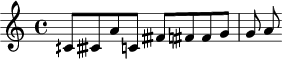

In [38]:
quarterToneNotes = [Note(x,(1,8)) for x in halfNumbers]
staff = Staff(quarterToneNotes)
show(staff)

## Conclusion

This tutorial outlines the basics of bottom-up work with Abjad. First, you create leaves by some mechanism, and then you put these leaves in containers, add spanners and indicators to them, etc., rather manually. 